# **Fuzzy C-means Clustering**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Fuzzy_Clustering_Porosity_Permeability.csv to Fuzzy_Clustering_Porosity_Permeability.csv


In [3]:
!pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 5.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=74b650eae90d2c2bef6fb565a0e3c413cf9112b9ba193d9e66c631fa1e2ee85b
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


Text(0, 0.5, 'Permeability')

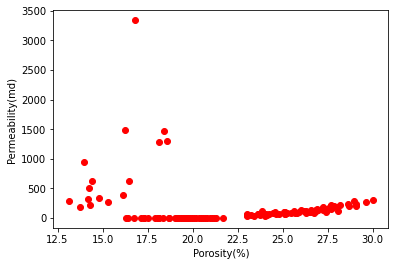

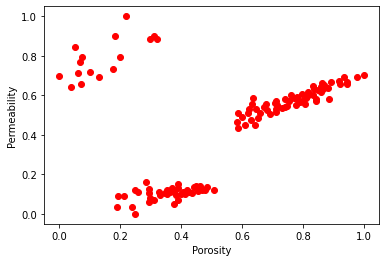

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy
import math
#Specify colors for different classes
colors=['b', 'grey', 'g', 'r', 'c', 'm', 'y', 'k', 'lime', 'purple']
#import Dataset and change permeability to log-scale
dataset = pd.read_csv('Fuzzy_Clustering_Porosity_Permeability.csv')
ds_log=pd.DataFrame.copy(dataset)
ds_log['Permeability']=ds_log['Permeability'].apply(math.log10)
# Scale the data from 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(ds_log)
ds_log_scaled=scaler.transform(ds_log)
#Transpose Scaled data for Fuzzy Cluster Algorithm
ds_log_scaled=ds_log_scaled.T
#Plot permeability vs porosity
plt.figure()
plt.plot(dataset['Porosity'],dataset['Permeability'],'ro')

plt.xlabel('Porosity(%)')
plt.ylabel('Permeability(md)')
#Plot permeability vs porosity with scaled data
plt.figure()
plt.plot(ds_log_scaled[0,:],ds_log_scaled[1,:],'ro')
plt.xlabel('Porosity')
plt.ylabel('Permeability')

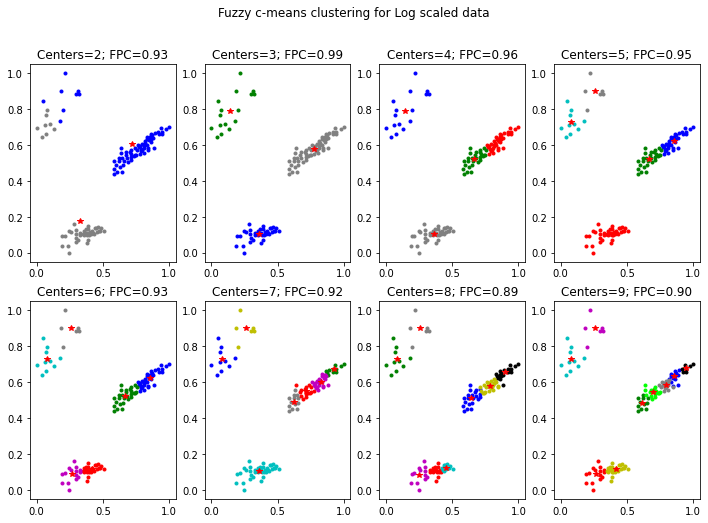

In [5]:
# Defining loops for Fuzzy C-means clustering and visualization with 8
#plots
import numpy as np
seed=50
np.random.seed(seed)
fig1, axes1=plt.subplots(2, 4, figsize=(12, 8))
fig1.suptitle('Fuzzy c-means clustering for Log scaled data')
fpcs=[ ] 
n=2
for ax in axes1.reshape(-1):
    cntr, u, u0, d, jm, p, fpc=skfuzzy.cluster.cmeans(ds_log_scaled,
    n, 1.5, error=0.001, maxiter=500,init=None)
    # Plotting defined classes, for each data point in the data set
    cluster_membership=np.argmax(u, axis=0)
    for i in range(n):   
        ax.plot(ds_log_scaled[0,:][cluster_membership==i],
                ds_log_scaled[1,:][cluster_membership==i], '.', 
                color=colors[i])
        # Mark the centroid for each class
    for x in cntr:
        ax.plot(x[0], x[1],'r*')  
    ax.set_title('Centers={0}; FPC={1:.2f}'.format(n,
    fpc))
    # Fuzzy partition coefficient storing
    fpcs.append(fpc)
    n = n + 1

Text(0, 0.5, 'Fuzzy Partition Coefficient(FCP)')

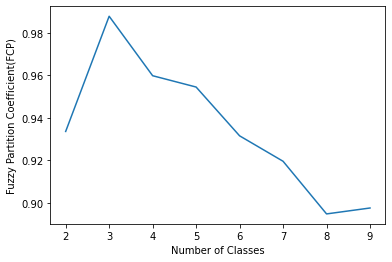

In [6]:
#Plot fuzzy partition coefficient vs number of classes
plt.plot(np.arange(2,10), fpcs)
plt.xlabel("Number of Classes")
plt.ylabel("Fuzzy Partition Coefficient(FCP)")